# Laboratorio #2
___

## Fashion MNIST

`Fashion-MNIST es un dataset de imágenes de artículos de ropa proporcionado por Zalando, creado como un reemplazo moderno del clásico MNIST de dígitos manuscritos. Está compuesto por 70,000 imágenes en escala de grises de 28×28 píxeles, divididas en 60,000 imágenes de entrenamiento y 10,000 de prueba. `

`Cada imagen está asociada con una etiqueta que indica el tipo de prenda, perteneciente a 10 clases:`
- **T-shirt/top** (Clase 0)
- **Trouser** (Clase 1)
- **Pullover** (Clase 2)
- **Dress** (Clase 3)
- **Coat** (Clase 4)
- **Sandal** (Clase 5)
- **Shirt** (Clase 6)
- **Sneaker** (Clase 7)
- **Bag** (Clase 8)
- **Ankle boot** (Clase 9)
___

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

___

### Importar de datos

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(f'Este data set esta conformado por {X_train.shape[0]} imagenes de {X_train.shape[1]}x{X_train.shape[2]} pixeles de datos de muestra.')
print(f'Los datos de entrenamiento suman {X_test.shape[0]} muestras de {X_test.shape[1]}x{X_test.shape[2]} pixeles igual que el entrenamiento.')
print(f'El target tiene {len(np.unique(y_train))} posibles valores de salida.')

Este data set esta conformado por 60000 imagenes de 28x28 pixeles de datos de muestra.
Los datos de entrenamiento suman 10000 muestras de 28x28 pixeles igual que el entrenamiento.
El target tiene 10 posibles valores de salida.


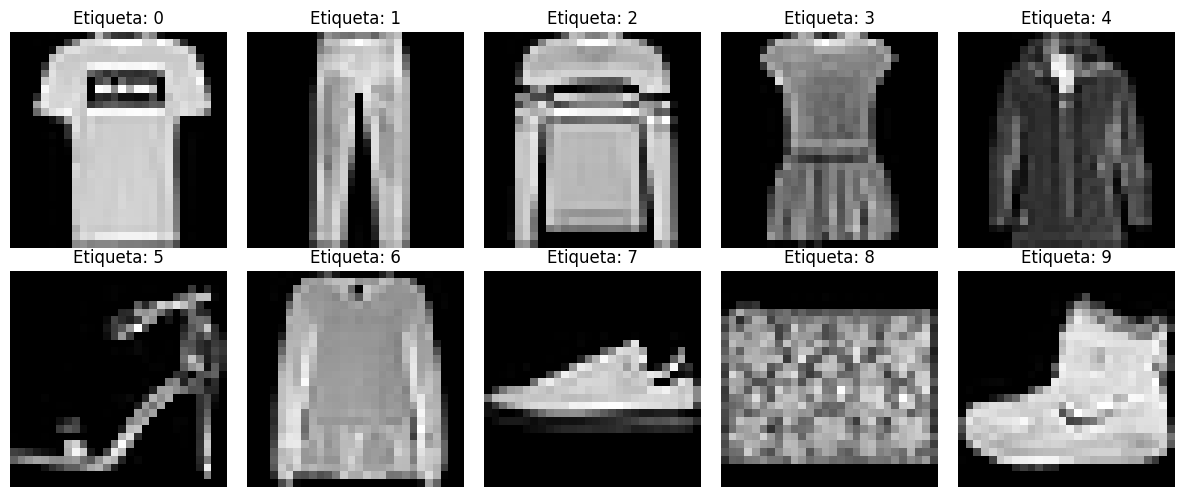

In [4]:
# Ejemplos de las imagenes

unique_labels = np.unique(y_train)  
examples = []

for label in unique_labels:
    idx = np.where(y_train == label)[0][0]  # primer índice donde aparece esa clase
    examples.append(idx)

# Graficamos
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i, idx in enumerate(examples):
    # Si tus imágenes están aplanadas (784,) hay que remodelarlas a 28x28
    img = X_train[idx].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Etiqueta: {y_train[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Modelos
___

### Logistic regression

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score

In [26]:
# Aplanar los datos a dos dimensiones

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print(f'Numero de dimensiones nueva del train: {X_train_flat.ndim}.')
print(f'Numero de dimensiones nueva del test: {X_test_flat.ndim}.')

Numero de dimensiones nueva del train: 2.
Numero de dimensiones nueva del test: 2.


In [27]:
# Escalar datos
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [30]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

c:\Users\Roi_f\ML_ITESO\Proyecto1_ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Roi_f\ML_ITESO\Proyecto1_ML\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
print("Accuracy de Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Accuracy de Logistic Regression: 0.8438


In [32]:
print("Reporte de Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Reporte de Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



___

# SVM

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC(
    C= 1.0, kernel= 'rbf', gamma='auto', max_iter= 10000,
    random_state= 19, 
    )

In [35]:
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
y_pred_svc = svc.predict(X_test_scaled)

In [39]:
print("Accuracy de SVC:", accuracy_score(y_test, y_pred_svc))

Accuracy de SVC: 0.8462


In [40]:
print("Reporte de SVC:\n", classification_report(y_test, y_pred_svc))

Reporte de SVC:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.75      0.75      1000
           3       0.84      0.88      0.86      1000
           4       0.74      0.78      0.76      1000
           5       0.93      0.91      0.92      1000
           6       0.65      0.53      0.58      1000
           7       0.90      0.93      0.91      1000
           8       0.94      0.96      0.95      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



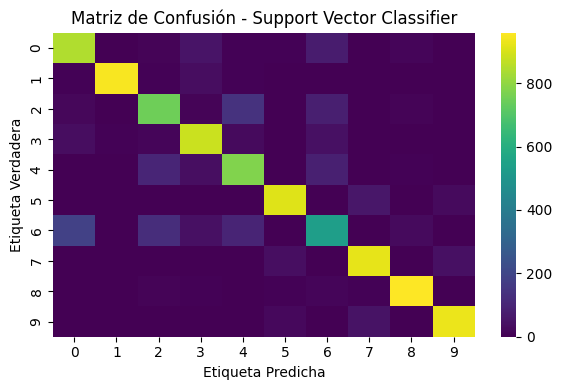

In [41]:
confusion_mtx_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_svc, cmap='viridis')
plt.title('Matriz de Confusión - Support Vector Classifier')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()    

___

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(
    criterion= 'entropy', n_estimators=100, 
    random_state= 19 
)

In [44]:
rfc.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred_rf = rfc.predict(X_test_scaled)

In [46]:
print("Accuracy de Random Forest:", accuracy_score(y_test, y_pred_rf))

Accuracy de Random Forest: 0.8764


In [47]:
print("Reporte de Random Forest:\n", classification_report(y_test, y_pred_rf))

Reporte de Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



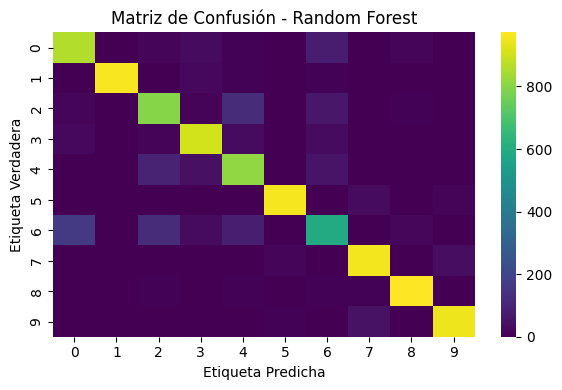

In [48]:
confusion_mtx_rfc = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_rfc, cmap='viridis')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()    

___

# Neural Network (MLP)

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),   
    activation='relu',               
    solver='adam',
    batch_size=256,
    learning_rate_init=1e-3,
    max_iter=50,                     
    early_stopping=True,             
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=True,
    random_state=42
)

In [51]:
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.58298718
Validation score: 0.842667
Iteration 2, loss = 0.39323871
Validation score: 0.863500
Iteration 3, loss = 0.34474991
Validation score: 0.863000
Iteration 4, loss = 0.32425519
Validation score: 0.862667
Iteration 5, loss = 0.30367646
Validation score: 0.869833
Iteration 6, loss = 0.28312123
Validation score: 0.875667
Iteration 7, loss = 0.26849516
Validation score: 0.873833
Iteration 8, loss = 0.26034682
Validation score: 0.886500
Iteration 9, loss = 0.24881176
Validation score: 0.887500
Iteration 10, loss = 0.23912504
Validation score: 0.891167
Iteration 11, loss = 0.22939466
Validation score: 0.880667
Iteration 12, loss = 0.21894209
Validation score: 0.889333
Iteration 13, loss = 0.21446206
Validation score: 0.888500
Iteration 14, loss = 0.20673752
Validation score: 0.889833
Iteration 15, loss = 0.20249630
Validation score: 0.890000
Iteration 16, loss = 0.19589179
Validation score: 0.890833
Iteration 17, loss = 0.18510865
Validation score: 0.888667
Iterat

,hidden_layer_sizes,"(256, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,256
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,42


In [52]:
y_pred_mlp = mlp.predict(X_test_scaled)

In [53]:
print("Accuracy de MLP:", accuracy_score(y_test, y_pred_mlp))

Accuracy de MLP: 0.891


In [54]:
print("Reporte de MLP:\n", classification_report(y_test, y_pred_mlp))

Reporte de MLP:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.79      0.80      1000
           3       0.93      0.86      0.89      1000
           4       0.77      0.86      0.81      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.73      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



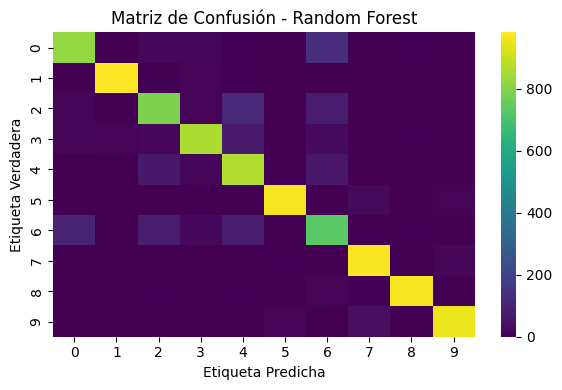

In [55]:
confusion_mtx_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx_mlp, cmap='viridis')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()   

___
# Convolutional Neural Network (CNN)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

### Convolutional Neural Network architecture

In [143]:
cnn = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)), # First Convolutional layer (32 features, 3x3 convloution window)
    layers.MaxPooling2D((2,2)), # 2x2 Filter Window 
        
    layers.Flatten(), # Data gets flattened into 1 dimension
    
    layers.Dense(32, activation="relu"), # Fully connected layer with 64 neurons 
    layers.Dense(10, activation="softmax") # Output layer with 10 output neurons (1 for each class)
])

cnn.summary()

c:\Users\Roi_f\ML_ITESO\Proyecto1_ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │       173,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,738 (678.66 KB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

He have a total of 93,322 parameters and a total 8 layers (including input and output)

In [144]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

X_train_cnn, X_val, y_train_cnn, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=11)

X_train_cnn_scaled = X_train_cnn / 255
X_val_scaled = X_val / 255

X_train_cnn_scaled = X_train_cnn_scaled.reshape(X_train_cnn_scaled.shape[0], 28, 28, 1)
X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], 28, 28, 1)

We create a validation set to constantly check the accuracy of the neural network

In [145]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    restore_best_weights=True
)

history = cnn.fit(X_train_cnn_scaled, y_train_cnn, epochs=50, validation_data=(X_val_scaled, y_val),
                  callbacks=[early_stopping], shuffle=True)

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7185 - loss: 0.8015 - val_accuracy: 0.7607 - val_loss: 0.6673
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8100 - loss: 0.5274 - val_accuracy: 0.7961 - val_loss: 0.5805
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8302 - loss: 0.4749 - val_accuracy: 0.7843 - val_loss: 0.6061
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8442 - loss: 0.4366 - val_accuracy: 0.8481 - val_loss: 0.4313
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8565 - loss: 0.4091 - val_accuracy: 0.8266 - val_loss: 0.4864
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8638 - loss: 0.3836 - val_accuracy: 0.8484 - val_loss: 0.4291
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8723 - loss: 0.3651 - val_accuracy: 0.8409 - val_loss: 0.4340
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8759 - loss

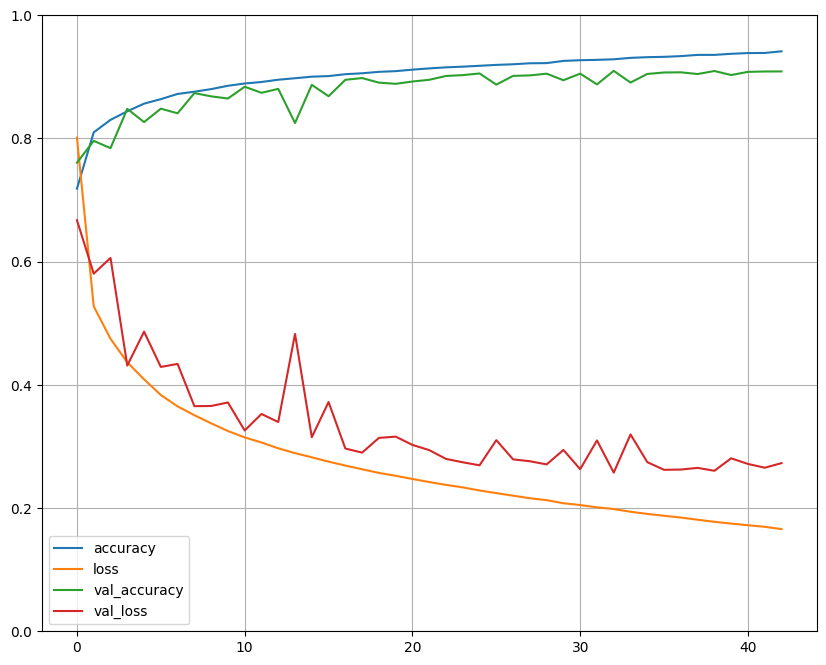

In [146]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [147]:
X_test_cnn = X_test / 255
y_pred_cnn = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [148]:
[(y_test[pred], np.argmax(y_pred_cnn[pred])) for pred in range(10)]

[(np.uint8(9), np.int64(9)),
 (np.uint8(2), np.int64(2)),
 (np.uint8(1), np.int64(1)),
 (np.uint8(1), np.int64(1)),
 (np.uint8(6), np.int64(6)),
 (np.uint8(1), np.int64(1)),
 (np.uint8(4), np.int64(4)),
 (np.uint8(6), np.int64(6)),
 (np.uint8(5), np.int64(5)),
 (np.uint8(7), np.int64(7))]

---
# Pruebas

In [149]:
import matplotlib.image as mpimg
from PIL import Image
import os

### Imagenes originales:

In [150]:
y_photos = np.array([8, 8, 8, 9, 9, 9, 4, 4, 4, 3, 3, 3, 2, 2, 2, 5, 5, 5, 6, 6, 6, 7, 7, 7, 1, 1, 1, 0, 0, 0])
y_photos.shape

(30,)

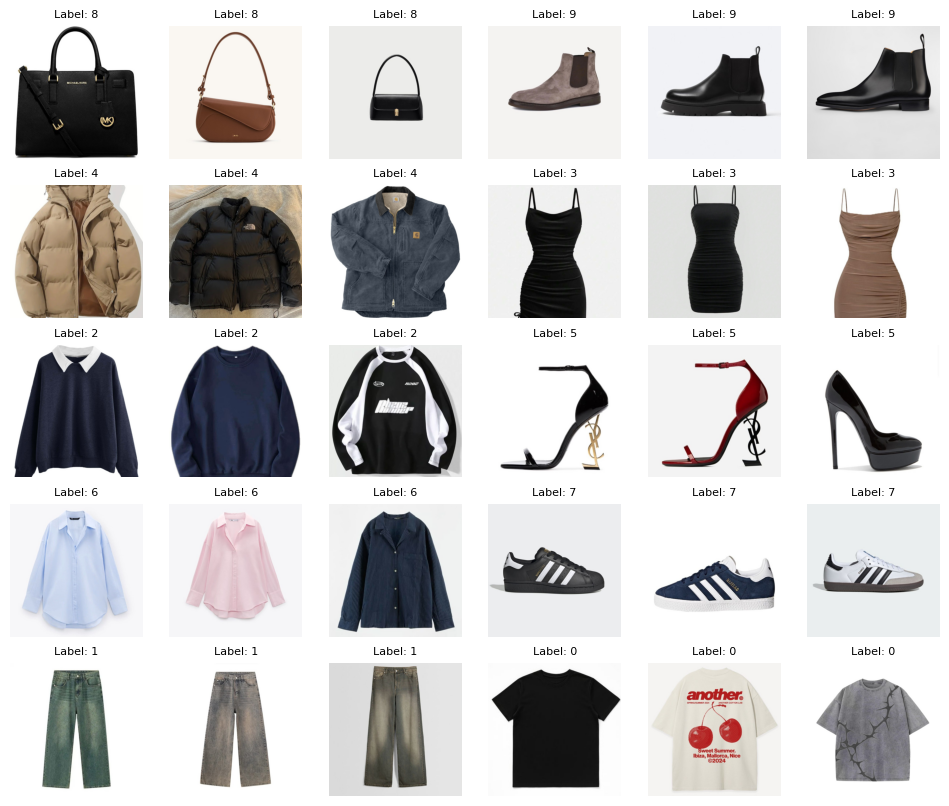

In [151]:
imagenes = os.listdir("images") 

fig, axes = plt.subplots(5, 6, figsize=(12, 10))
axes = axes.flatten()

for i, img_name in enumerate(imagenes):
    img = mpimg.imread(os.path.join("images", img_name))
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {y_photos[i]}", fontsize=8)
    axes[i].axis("off")  
plt.show()

In [152]:
X_photos_flatten = []
X_photos_cnn = []

for img_name in imagenes:
    img = Image.open(os.path.join("images", img_name))
    img = img.convert("L")
    img = img.resize((28, 28))
    
    img_array = np.array(img)
    
    # 1. Invert colors to match the training data's background
    img_array_inverted = 255 - img_array
    
    # 2. Flatten the inverted image for the scaler
    img_flattened = img_array_inverted.flatten() 
    
    # 3. Apply the same scaler used for training data
    img_array_scaled = scaler.transform(img_flattened.reshape(-1,1)).flatten()
    X_photos_flatten.append(img_array_scaled)
    
    # 4. Reshape for the CNN model
    img_cnn = img_array_scaled.reshape(28,28,1) # Add the channel dimension
    X_photos_cnn.append(img_cnn)

X_photos_flatten = np.array(X_photos_flatten)
X_photos_cnn = np.array(X_photos_cnn)

print("Imágenes procesadas correctamente")
print("Flatten:", X_photos_flatten.shape)   
print("CNN:", X_photos_cnn.shape)

Imágenes procesadas correctamente
Flatten: (30, 784)
CNN: (30, 28, 28, 1)


### Imagenes preprocesadas:

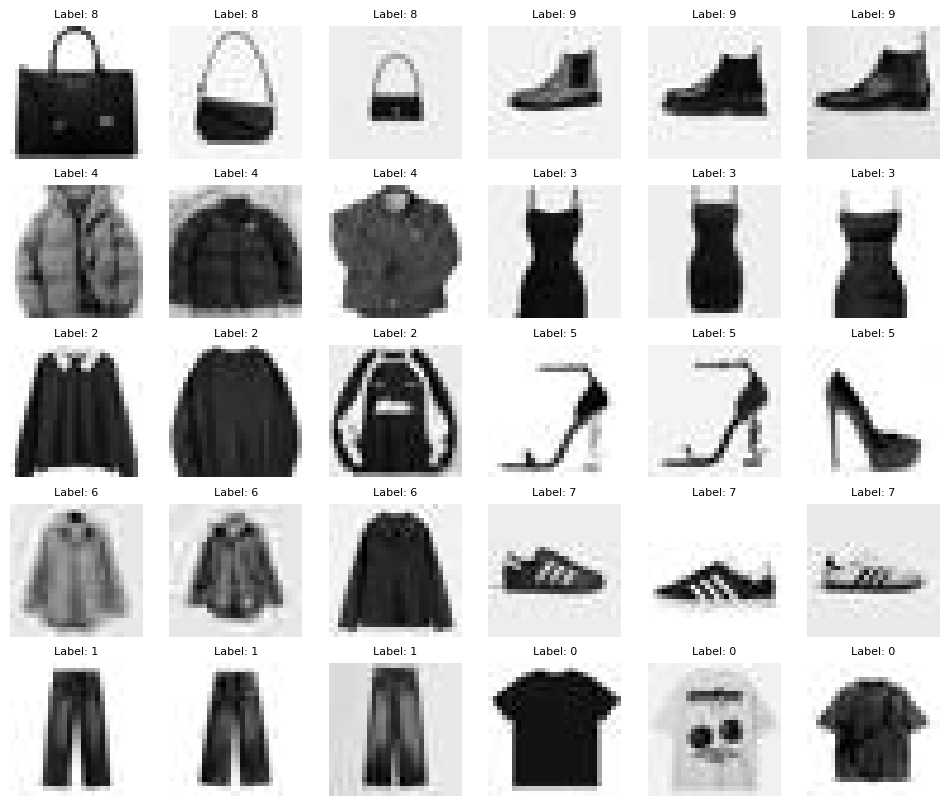

In [153]:
imagenes_procesadas = os.listdir("images_processed") 

fig, axes = plt.subplots(5, 6, figsize=(12, 10))
axes = axes.flatten()

for i, img_name in enumerate(imagenes_procesadas):
    img = mpimg.imread(os.path.join("images_processed", img_name))
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Label: {y_photos[i]}", fontsize=8)
    axes[i].axis("off")  
plt.show()

### Probando los modelos con las imagenes nuevas

In [154]:
models = {
    "Log-Reg": log_reg,
    "SVC": svc,
    "RFC": rfc,
    "MLP": mlp,
    "CNN": cnn
}

In [155]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

def show_and_evaluate_models(models, X_test_flat, X_test_cnn, y_test, n_images=10):
    """
    Muestra las predicciones de los primeros n_images para cada modelo
    y devuelve un DataFrame con métricas de evaluación.
    
    - X_test_flat: imágenes aplanadas para scikit-learn
    - X_test_cnn: imágenes originales para CNN (shape: n_samples,28,28,1)
    - y_test: etiquetas en vector
    """
    results = []
    
    for name, model in models.items():
        # Detectar si es un modelo de Keras
        if isinstance(model, tf.keras.Model):
            X_input = X_test_cnn
            y_prob = model.predict(X_input, verbose=0)
            y_pred = np.argmax(y_prob, axis=1)
        else:
            X_input = X_test_flat
            y_pred = model.predict(X_input)
        
        # Calcular métricas
        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred, average="macro"),
            "F1-score": f1_score(y_test, y_pred, average="macro")
        })
        
        # Mostrar primeras n_images
        fig, axes = plt.subplots(1, n_images, figsize=(2*n_images, 3))
        if n_images == 1:
            axes = [axes]
        
        for i in range(n_images):
            img = X_input[i]
            # Si es CNN, eliminar canal si existe
            if isinstance(model, tf.keras.Model) and img.ndim == 3 and img.shape[-1] == 1:
                img = img.reshape(28,28)
            elif not isinstance(model, tf.keras.Model):
                img = img.reshape(28,28)
            
            axes[i].imshow(img, cmap="gray")
            axes[i].set_title(f"Pred: {y_pred[i]}")
            axes[i].axis("off")
        
        plt.suptitle(f"Predicciones de {name}")
        plt.tight_layout()
        plt.show()
    
    df_results = pd.DataFrame(results).set_index("Model")
    return df_results



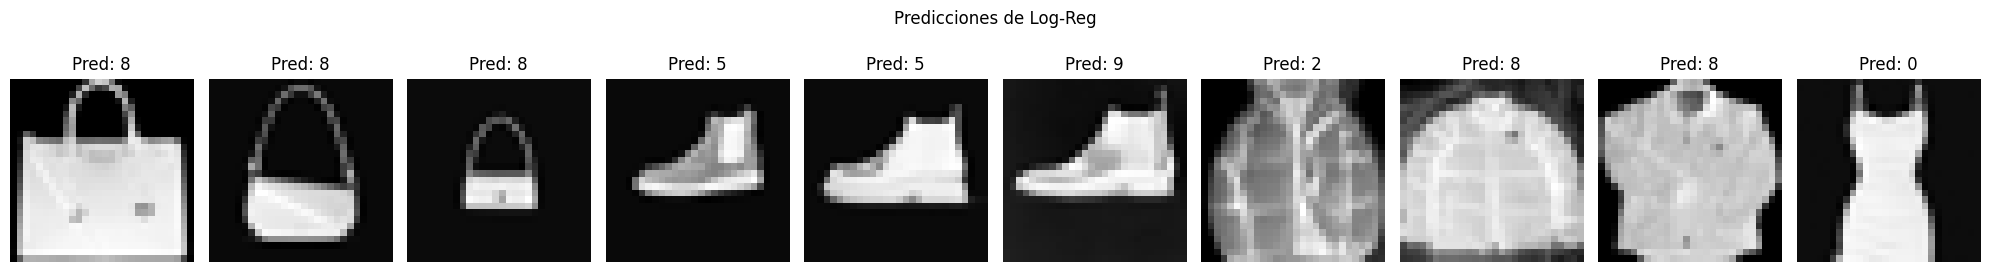

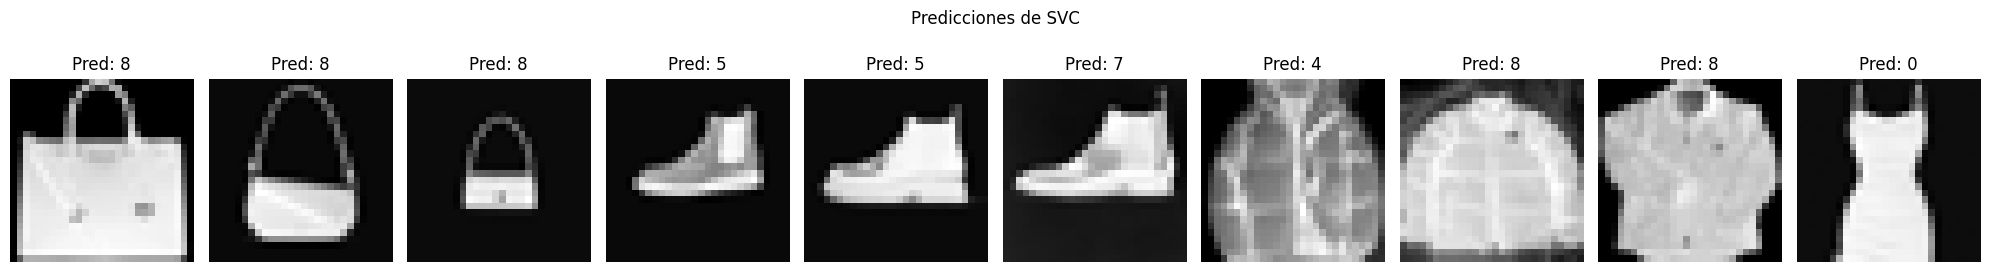

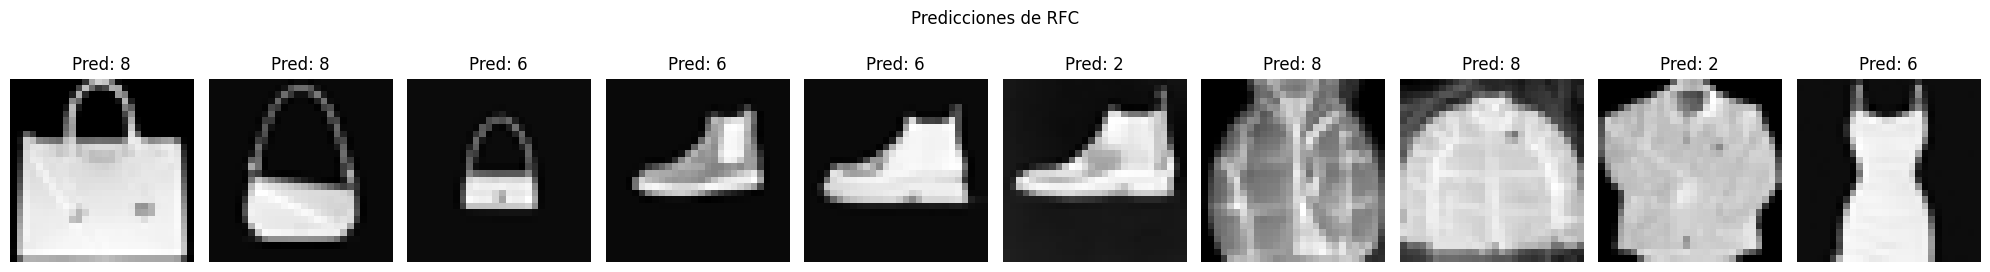

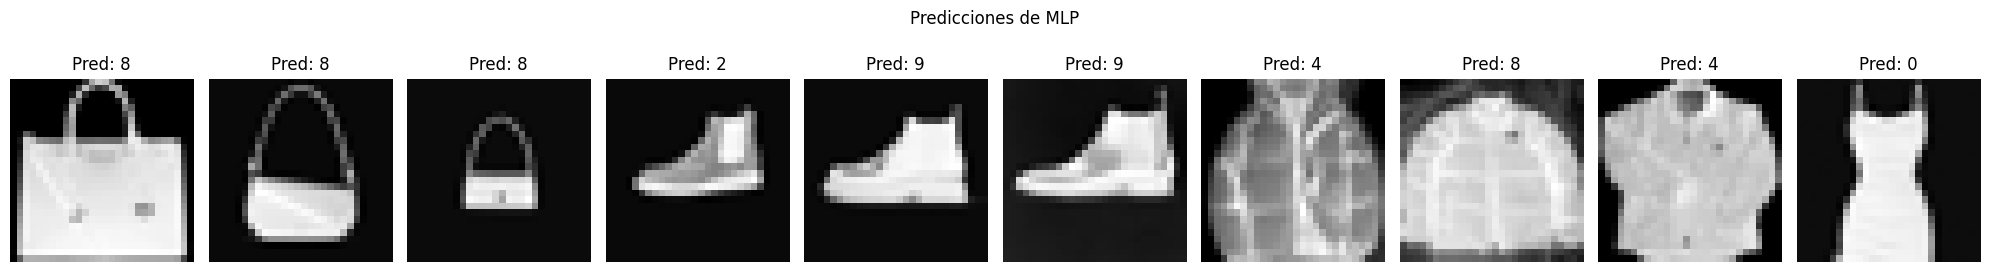

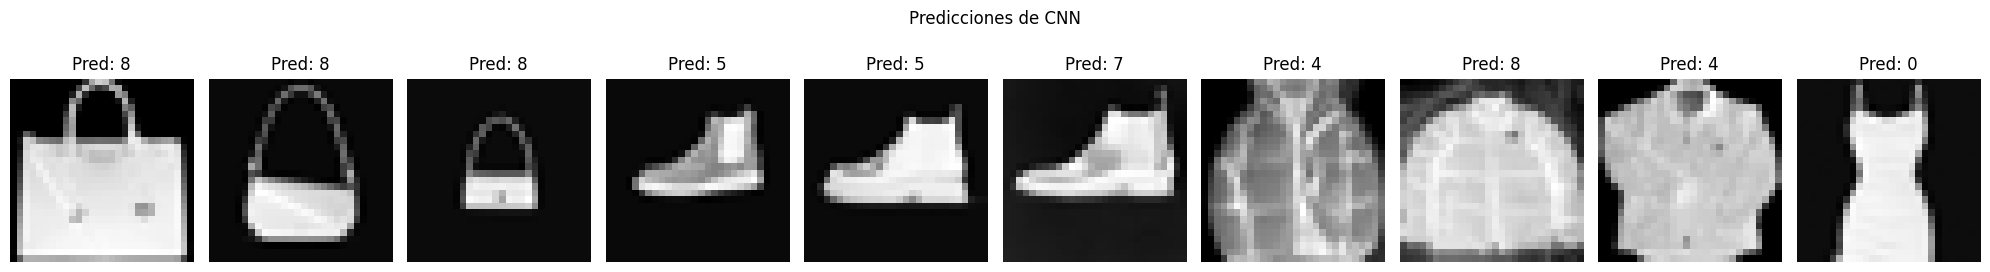

In [156]:
df_metrics = show_and_evaluate_models(
    models, 
    X_test_flat=X_photos_flatten, 
    X_test_cnn=X_photos_cnn, 
    y_test=y_photos, 
    n_images=10
)

In [157]:
df_metrics

,Accuracy,Recall,F1-score
Model,,,
Log-Reg,0.400000,0.400000,0.376154
SVC,0.400000,0.400000,0.360000
RFC,0.266667,0.266667,0.256190
MLP,0.500000,0.500000,0.486667
CNN,0.500000,0.500000,0.450952


# Resultados

Los resultados obtenidos con los distintos modelos oscilan entre 84% y 94% de Accuracy. El modelo de CNN fue el que mejor resultados arrojó, alcanzando un 94% de precisión. Este resultado no es una sorpresa, pues sabemos, gracias a lo que hemos visto en la clase, que las Máquinas de Vector de Soporte (SVC, con un 84.62% de precisión) han sido rebasadas por este tipo de arquitecturas en competencias internacionales de visión por computadora.

Otros modelos, como la Regresión Logística (con un 84.38%), el Random Forest (con un 87.64%) y el MLP (con un 89.1%), también obtuvieron buenos resultados, pero su rendimiento fue inferior al de la CNN.

Al intentar aplicar nuestros modelos a distintas imágenes que recabamos, no obtuvimos resultados tan buenos como con las imágenes que se manejan en FMNIST. Creemos que esto puede ser debido a diferencias de formato, aunque tratamos de hacer que fueran lo más parecidas posible.